4. Haga un modelo de clasificación, use la variable categórica que hizo con el precio de las
casas (barata, media y cara) como variable respuesta.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar los datos
df = pd.read_csv("../dataset/train.csv")

In [3]:
# Crear la variable categórica `PriceCategory` basada en percentiles de `SalePrice`
low_threshold = np.percentile(df['SalePrice'], 33)
high_threshold = np.percentile(df['SalePrice'], 67)

def categorize_price(price):
    if price < low_threshold:
        return "Económica"
    elif price <= high_threshold:
        return "Intermedia"
    else:
        return "Cara"

df['PriceCategory'] = df['SalePrice'].apply(categorize_price)

# Verificar que la variable fue creada correctamente
print(df[['SalePrice', 'PriceCategory']].head(10))


   SalePrice PriceCategory
0     208500          Cara
1     181500    Intermedia
2     223500          Cara
3     140000    Intermedia
4     250000          Cara
5     143000    Intermedia
6     307000          Cara
7     200000          Cara
8     129900     Económica
9     118000     Económica


Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Reporte de Clasificación:
              precision    recall  f1-score   support

        Cara       0.82      0.84      0.83        94
   Económica       0.85      0.83      0.84       109
  Intermedia       0.68      0.69      0.68        89

    accuracy                           0.79       292
   macro avg       0.78      0.78      0.78       292
weighted avg       0.79      0.79      0.79       292



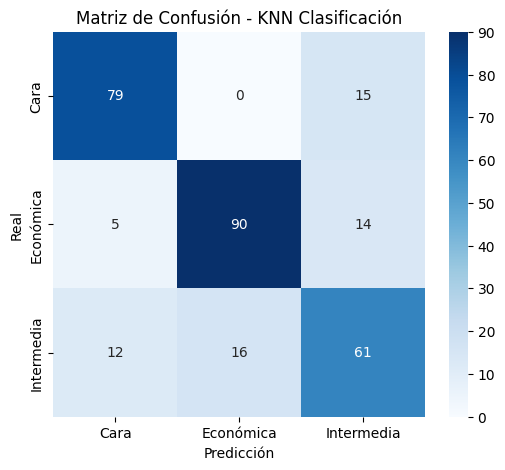

In [4]:

# Variables predictoras (mismas usadas en modelos previos)
predictors = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']
X = df[predictors]
y = df['PriceCategory']  # Variable categórica creada previamente

# División en conjunto de entrenamiento y prueba (mismo random_state para comparabilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuración de hiperparámetros para GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo obtenido
best_knn = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

# Predicción en conjunto de prueba
y_pred = best_knn.predict(X_test)

# Evaluación del modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN Clasificación")
plt.show()
